In [1]:
# Import necessary libraries
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from prophet import Prophet
from scipy.stats import pearsonr

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Load data from Excel files
energy_data = pd.read_excel("/content/drive/My Drive/energy.xlsx", sheet_name=["Motor fuel inflation", "Gas inflation"], skiprows=5)
food_data = pd.read_excel("/content/drive/My Drive/food.xlsx", sheet_name=["Food inflation", "Restaurant and cafe inflation"], skiprows=5)


In [ ]:
energy_data['Motor fuel inflation']

,Date,Motor fuels
0,2012-10-01,2.4
1,2012-11-01,1.0
2,2012-12-01,-0.2
3,2013-01-01,-0.8
4,2013-02-01,0.8
...,...,...
131,2023-09-01,-9.7
132,2023-10-01,-7.6
133,2023-11-01,-10.6
134,2023-12-01,-10.8


In [ ]:
energy_data['Gas inflation']

,Date,Gas
0,2012-10-01,-1.0
1,2012-11-01,-0.1
2,2012-12-01,5.2
3,2013-01-01,5.2
4,2013-02-01,7.2
...,...,...
131,2023-09-01,1.7
132,2023-10-01,-31.0
133,2023-11-01,-31.0
134,2023-12-01,-31.0


In [ ]:
food_data['Food inflation']

,Date,Food and non-alcoholic beverages
0,2012-10-01,3.4
1,2012-11-01,3.9
2,2012-12-01,3.8
3,2013-01-01,4.2
4,2013-02-01,3.7
...,...,...
131,2023-09-01,12.2
132,2023-10-01,10.1
133,2023-11-01,9.2
134,2023-12-01,8.0


In [ ]:
food_data["Restaurant and cafe inflation"]

,Date,Restaurants and cafés
0,2012-10-01,2.9
1,2012-11-01,3.0
2,2012-12-01,3.0
3,2013-01-01,2.9
4,2013-02-01,2.9
...,...,...
131,2023-09-01,9.1
132,2023-10-01,8.8
133,2023-11-01,8.2
134,2023-12-01,7.7


In [4]:
Motor_fuel_inflation = energy_data['Motor fuel inflation']
gas_inflation = energy_data['Gas inflation']
food_inflation = food_data['Food inflation']
restaurant_cafe_inflation = food_data['Restaurant and cafe inflation']

# Preprocess data

In [5]:
# Preprocess each dataframe to ensure date is set as index and in datetime format
def preprocess_sheet(df, column_name):
    # Strip whitespace from column names to avoid issues with extra spaces
    df.columns = df.columns.str.strip()

    # Check if 'Date' column exists and convert it to datetime
    if 'Date' in df.columns:
        df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
        df.dropna(subset=['Date'], inplace=True)
        df.set_index('Date', inplace=True)

        # Ensure only the relevant inflation column is kept
        if column_name not in df.columns:
            raise KeyError(f"'{column_name}' column not found in the sheet.")
        df = df[[column_name]]
    else:
        raise KeyError(f"'Date' column not found in the sheet for {column_name}.")

    return df

# Apply preprocessing to each dataset
Motor_fuel_inflation = preprocess_sheet(Motor_fuel_inflation, 'Motor fuels')
gas_inflation = preprocess_sheet(gas_inflation, 'Gas')
food_inflation = preprocess_sheet(food_inflation, 'Food and non-alcoholic beverages')
restaurant_cafe_inflation = preprocess_sheet(restaurant_cafe_inflation, 'Restaurants and cafés')

# Verify preprocessing results by displaying the first few rows of each dataframe
print("Motor Fuel Inflation Data:\n", Motor_fuel_inflation.head())
print("\nGas Inflation Data:\n", gas_inflation.head())
print("\nFood Inflation Data:\n", food_inflation.head())
print("\nRestaurant and Cafe Inflation Data:\n", restaurant_cafe_inflation.head())

Motor Fuel Inflation Data:
             Motor fuels
Date                   
2012-10-01          2.4
2012-11-01          1.0
2012-12-01         -0.2
2013-01-01         -0.8
2013-02-01          0.8

Gas Inflation Data:
             Gas
Date           
2012-10-01 -1.0
2012-11-01 -0.1
2012-12-01  5.2
2013-01-01  5.2
2013-02-01  7.2

Food Inflation Data:
             Food and non-alcoholic beverages
Date                                        
2012-10-01                               3.4
2012-11-01                               3.9
2012-12-01                               3.8
2013-01-01                               4.2
2013-02-01                               3.7

Restaurant and Cafe Inflation Data:
             Restaurants and cafés
Date                             
2012-10-01                    2.9
2012-11-01                    3.0
2012-12-01                    3.0
2013-01-01                    2.9
2013-02-01                    2.9


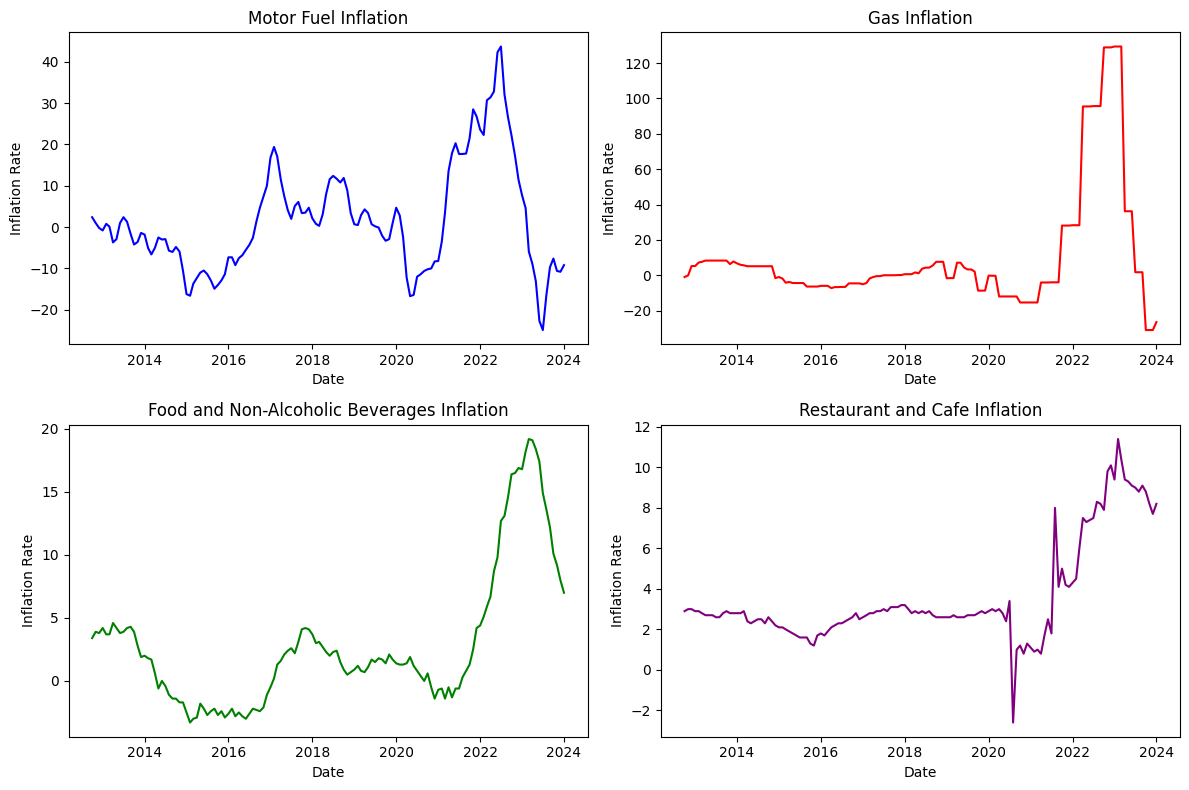

In [6]:
# Import libraries
import matplotlib.pyplot as plt

# Plot each dataset to visualize inflation trends
plt.figure(figsize=(12, 8))

# Motor Fuel Inflation
plt.subplot(2, 2, 1)
plt.plot(Motor_fuel_inflation.index, Motor_fuel_inflation['Motor fuels'], color='blue')
plt.title('Motor Fuel Inflation')
plt.xlabel('Date')
plt.ylabel('Inflation Rate')

# Gas Inflation
plt.subplot(2, 2, 2)
plt.plot(gas_inflation.index, gas_inflation['Gas'], color='red')
plt.title('Gas Inflation')
plt.xlabel('Date')
plt.ylabel('Inflation Rate')

# Food Inflation
plt.subplot(2, 2, 3)
plt.plot(food_inflation.index, food_inflation['Food and non-alcoholic beverages'], color='green')
plt.title('Food and Non-Alcoholic Beverages Inflation')
plt.xlabel('Date')
plt.ylabel('Inflation Rate')

# Restaurant and Cafe Inflation
plt.subplot(2, 2, 4)
plt.plot(restaurant_cafe_inflation.index, restaurant_cafe_inflation['Restaurants and cafés'], color='purple')
plt.title('Restaurant and Cafe Inflation')
plt.xlabel('Date')
plt.ylabel('Inflation Rate')

plt.tight_layout()
plt.show()


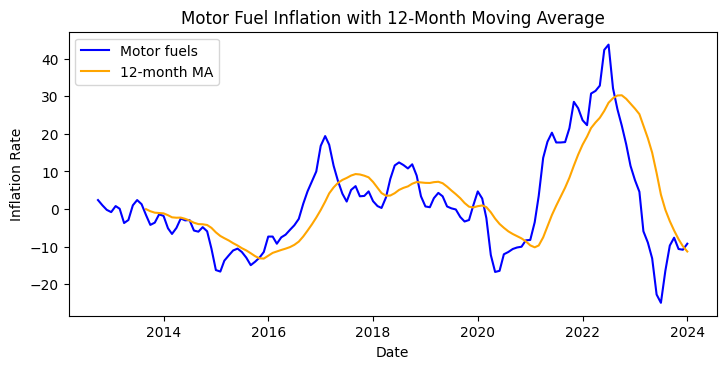

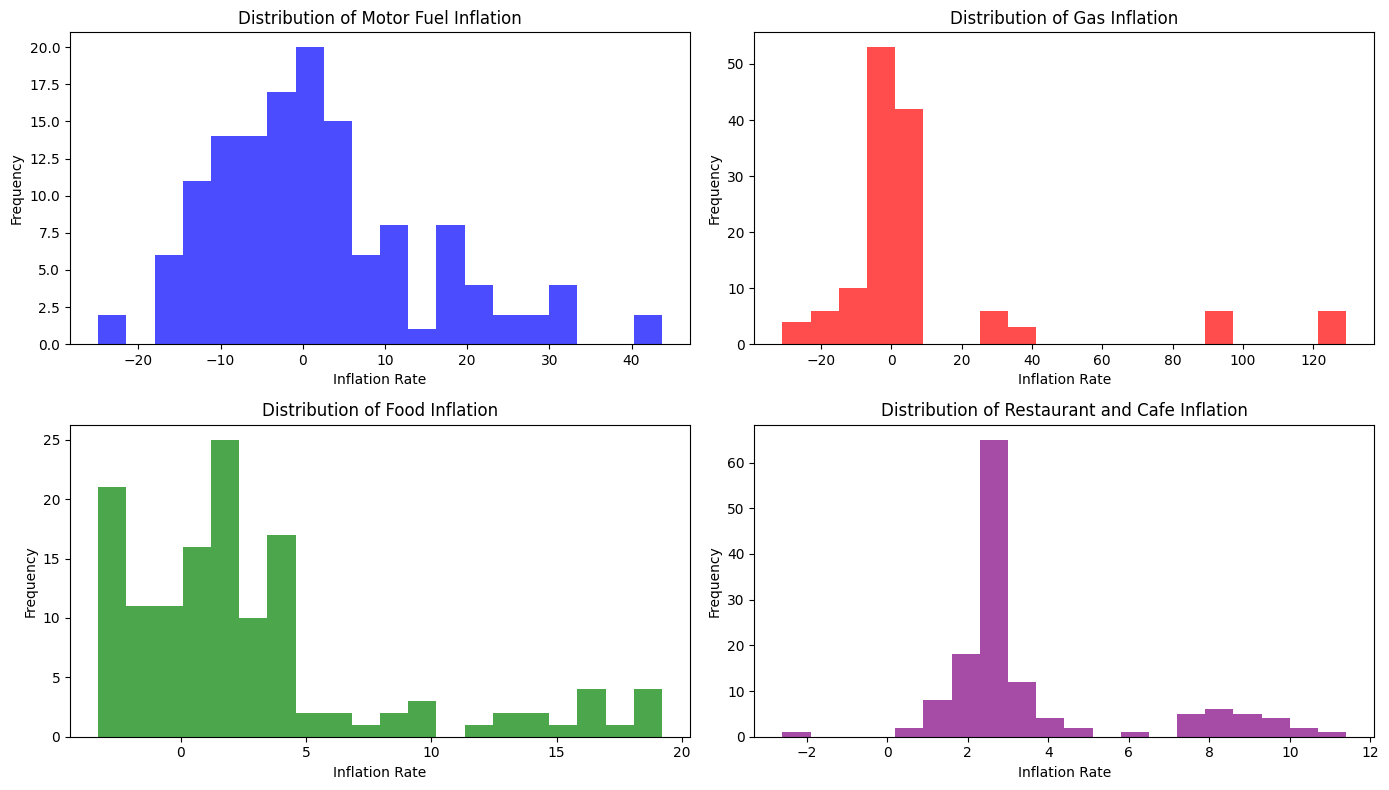

In [7]:
# Import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Plot each dataset to visualize inflation trends
plt.figure(figsize=(14, 10))


# Moving Average (Example: 12-month moving average for Motor Fuel Inflation)
Motor_fuel_inflation['12-month MA'] = Motor_fuel_inflation['Motor fuels'].rolling(window=12).mean()
plt.subplot(3, 2, 5)
plt.plot(Motor_fuel_inflation.index, Motor_fuel_inflation['Motor fuels'], label='Motor fuels', color='blue')
plt.plot(Motor_fuel_inflation.index, Motor_fuel_inflation['12-month MA'], label='12-month MA', color='orange')
plt.title('Motor Fuel Inflation with 12-Month Moving Average')
plt.xlabel('Date')
plt.ylabel('Inflation Rate')
plt.legend()

plt.tight_layout()
plt.show()

# Histograms to show distribution of inflation rates in each category
plt.figure(figsize=(14, 8))

plt.subplot(2, 2, 1)
plt.hist(Motor_fuel_inflation['Motor fuels'], bins=20, color='blue', alpha=0.7)
plt.title('Distribution of Motor Fuel Inflation')
plt.xlabel('Inflation Rate')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(gas_inflation['Gas'], bins=20, color='red', alpha=0.7)
plt.title('Distribution of Gas Inflation')
plt.xlabel('Inflation Rate')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(food_inflation['Food and non-alcoholic beverages'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Food Inflation')
plt.xlabel('Inflation Rate')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(restaurant_cafe_inflation['Restaurants and cafés'], bins=20, color='purple', alpha=0.7)
plt.title('Distribution of Restaurant and Cafe Inflation')
plt.xlabel('Inflation Rate')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



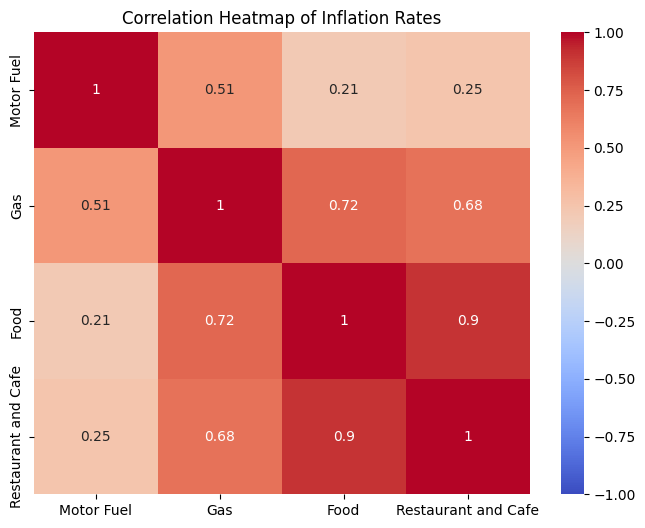

In [8]:
# Correlation heatmap to show relationships between inflation rates
# Merge data for correlation analysis
merged_data = pd.concat([
    Motor_fuel_inflation['Motor fuels'],
    gas_inflation['Gas'],
    food_inflation['Food and non-alcoholic beverages'],
    restaurant_cafe_inflation['Restaurants and cafés']
], axis=1)

merged_data.columns = ['Motor Fuel', 'Gas', 'Food', 'Restaurant and Cafe']

plt.figure(figsize=(8, 6))
sns.heatmap(merged_data.corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Inflation Rates')
plt.show()

# SARIMA

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[12] intercept   : AIC=648.703, Time=2.26 sec
 ARIMA(0,0,0)(0,0,0)[12] intercept   : AIC=1087.136, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[12] intercept   : AIC=724.337, Time=0.23 sec
 ARIMA(0,0,1)(0,0,1)[12] intercept   : AIC=917.757, Time=0.30 sec
 ARIMA(0,0,0)(0,0,0)[12]             : AIC=1087.180, Time=0.04 sec
 ARIMA(2,0,2)(0,0,1)[12] intercept   : AIC=644.484, Time=0.91 sec
 ARIMA(2,0,2)(0,0,0)[12] intercept   : AIC=686.041, Time=0.34 sec
 ARIMA(2,0,2)(0,0,2)[12] intercept   : AIC=inf, Time=5.25 sec
 ARIMA(2,0,2)(1,0,0)[12] intercept   : AIC=660.677, Time=1.68 sec
 ARIMA(2,0,2)(1,0,2)[12] intercept   : AIC=646.553, Time=2.70 sec
 ARIMA(1,0,2)(0,0,1)[12] intercept   : AIC=642.818, Time=0.43 sec
 ARIMA(1,0,2)(0,0,0)[12] intercept   : AIC=686.768, Time=0.12 sec
 ARIMA(1,0,2)(1,0,1)[12] intercept   : AIC=643.450, Time=1.25 sec
 ARIMA(1,0,2)(0,0,2)[12] intercept   : AIC=643.280, Time=0.79 sec
 ARIMA(1,0,2)(1,0,0)[12] intercept 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=1006.865, Time=1.45 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=1050.428, Time=0.04 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=1021.730, Time=0.21 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=1004.400, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=1048.463, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[12] intercept   : AIC=1052.428, Time=0.07 sec
 ARIMA(0,1,1)(1,0,1)[12] intercept   : AIC=1006.377, Time=0.38 sec
 ARIMA(0,1,1)(0,0,2)[12] intercept   : AIC=1006.361, Time=0.60 sec
 ARIMA(0,1,1)(1,0,0)[12] intercept   : AIC=1021.730, Time=0.35 sec
 ARIMA(0,1,1)(1,0,2)[12] intercept   : AIC=1007.098, Time=2.85 sec
 ARIMA(0,1,0)(0,0,1)[12] intercept   : AIC=1002.400, Time=0.38 sec
 ARIMA(0,1,0)(1,0,1)[12] intercept   : AIC=1004.378, Time=0.92 sec
 ARIMA(0,1,0)(0,0,2)[12] intercept   : AIC=1004.362, Time=0.77 sec
 ARIMA(0,1,0)(1,0,0)[12] intercept   : AIC=1019.730, Time=0.32 sec
 ARIMA(0,1,0)(1,0,2

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=2.89 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=313.651, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=255.793, Time=0.19 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.67 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=311.816, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=283.050, Time=0.06 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=248.838, Time=0.41 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=6.38 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.72 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=283.779, Time=0.33 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=229.034, Time=0.61 sec
 ARIMA(2,1,0)(1,0,0)[12] intercept   : AIC=239.694, Time=0.26 sec
 ARIMA(2,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=2.35 sec
 ARIMA(2,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=1.14 sec
 ARIMA(3,1,0)(2,0,0)[12] intercept   : AIC=216.365, Time=

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[12] intercept   : AIC=inf, Time=1.25 sec
 ARIMA(0,1,0)(0,0,0)[12] intercept   : AIC=377.780, Time=0.06 sec
 ARIMA(1,1,0)(1,0,0)[12] intercept   : AIC=322.324, Time=0.20 sec
 ARIMA(0,1,1)(0,0,1)[12] intercept   : AIC=inf, Time=0.64 sec
 ARIMA(0,1,0)(0,0,0)[12]             : AIC=376.003, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[12] intercept   : AIC=344.450, Time=0.06 sec
 ARIMA(1,1,0)(2,0,0)[12] intercept   : AIC=312.282, Time=0.44 sec
 ARIMA(1,1,0)(2,0,1)[12] intercept   : AIC=inf, Time=1.77 sec
 ARIMA(1,1,0)(1,0,1)[12] intercept   : AIC=inf, Time=0.61 sec
 ARIMA(0,1,0)(2,0,0)[12] intercept   : AIC=340.669, Time=0.31 sec
 ARIMA(2,1,0)(2,0,0)[12] intercept   : AIC=312.523, Time=0.50 sec
 ARIMA(1,1,1)(2,0,0)[12] intercept   : AIC=313.218, Time=0.56 sec
 ARIMA(0,1,1)(2,0,0)[12] intercept   : AIC=315.569, Time=0.40 sec
 ARIMA(2,1,1)(2,0,0)[12] intercept   : AIC=313.623, Time=1.07 sec
 ARIMA(1,1,0)(2,0,0)[12]             : AIC=312.95

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-14-93e7e681cbe3>:42: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(series.index[-1], periods=len(forecast.predicted_mean) + 1, freq='M')[1:]


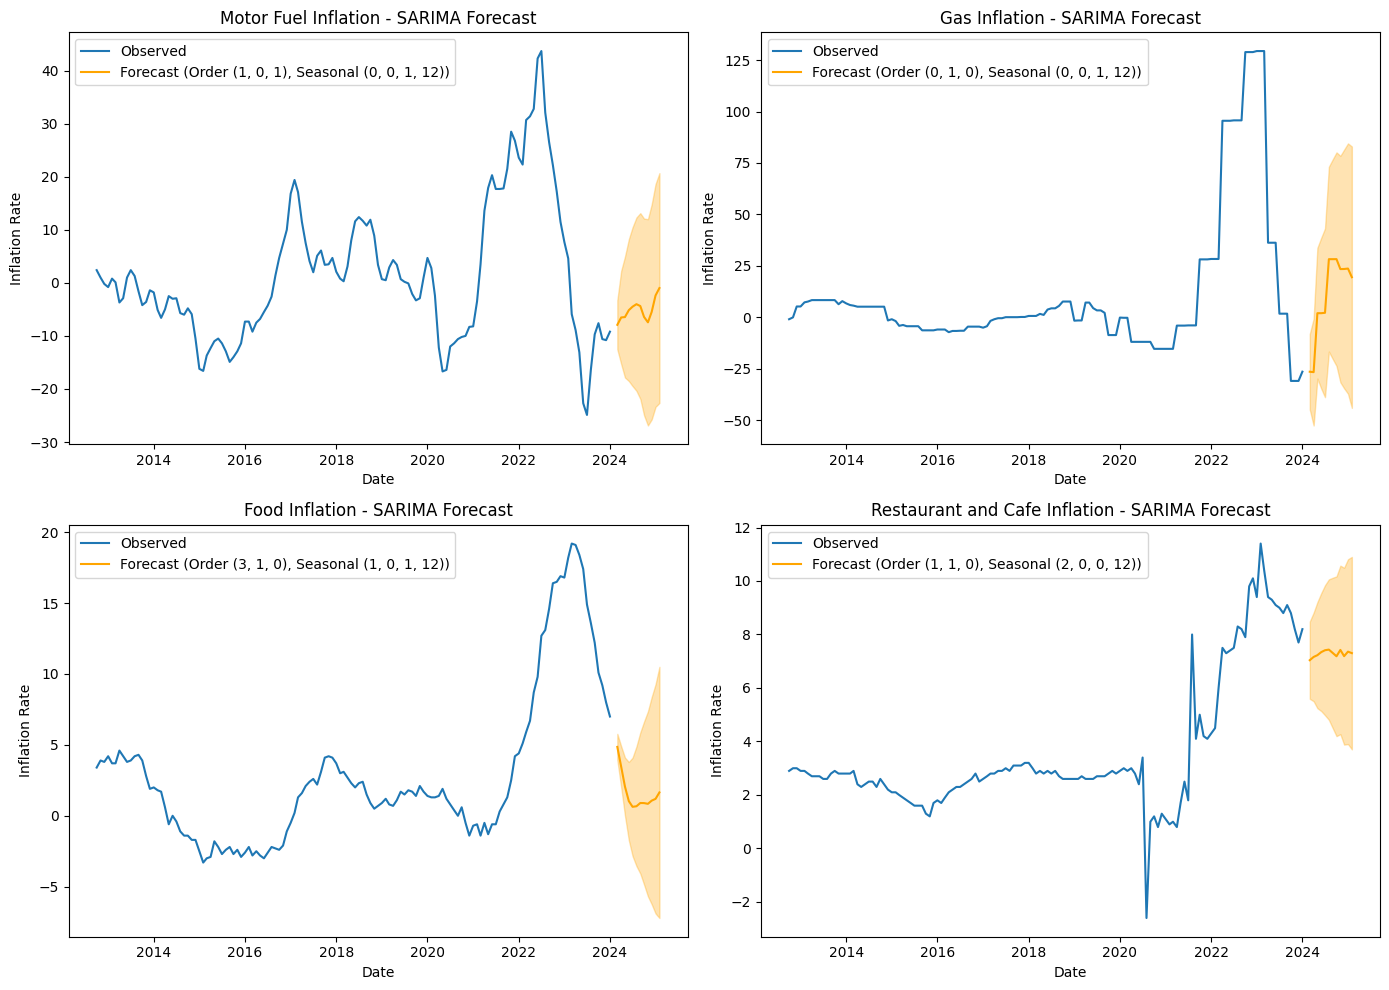

In [14]:
from pmdarima import auto_arima
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt
import pandas as pd

# Function to use auto_arima to find the best seasonal order and fit SARIMA model
def sarima_forecast_auto(series, steps=12):
    # Use auto_arima to find the best p, d, q, P, D, Q, and seasonal period
    auto_model = auto_arima(series, seasonal=True, m=12, stepwise=True, trace=True)
    best_order = auto_model.order
    best_seasonal_order = auto_model.seasonal_order

    # Fit the SARIMA model with the best order
    model = SARIMAX(series, order=best_order, seasonal_order=best_seasonal_order)
    sarima_model = model.fit(disp=False)

    # Forecast
    forecast = sarima_model.get_forecast(steps=steps)
    forecast_ci = forecast.conf_int()
    return forecast, forecast_ci, best_order, best_seasonal_order

# Forecast for each dataset
motor_fuel_forecast, motor_fuel_ci, motor_fuel_order, motor_fuel_seasonal_order = sarima_forecast_auto(Motor_fuel_inflation['Motor fuels'])
gas_forecast, gas_ci, gas_order, gas_seasonal_order = sarima_forecast_auto(gas_inflation['Gas'])
food_forecast, food_ci, food_order, food_seasonal_order = sarima_forecast_auto(food_inflation['Food and non-alcoholic beverages'])
restaurant_cafe_forecast, restaurant_cafe_ci, restaurant_cafe_order, restaurant_cafe_seasonal_order = sarima_forecast_auto(restaurant_cafe_inflation['Restaurants and cafés'])

# Dictionary to hold datasets and their SARIMA results
datasets = {
    'Motor Fuel Inflation': (Motor_fuel_inflation['Motor fuels'], motor_fuel_forecast, motor_fuel_ci, motor_fuel_order, motor_fuel_seasonal_order),
    'Gas Inflation': (gas_inflation['Gas'], gas_forecast, gas_ci, gas_order, gas_seasonal_order),
    'Food Inflation': (food_inflation['Food and non-alcoholic beverages'], food_forecast, food_ci, food_order, food_seasonal_order),
    'Restaurant and Cafe Inflation': (restaurant_cafe_inflation['Restaurants and cafés'], restaurant_cafe_forecast, restaurant_cafe_ci, restaurant_cafe_order, restaurant_cafe_seasonal_order)
}

# Plot SARIMA forecasts in subplots
plt.figure(figsize=(14, 10))

for i, (title, (series, forecast, ci, best_order, best_seasonal_order)) in enumerate(datasets.items(), start=1):
    plt.subplot(2, 2, i)
    plt.plot(series.index, series, label='Observed')
    forecast_index = pd.date_range(series.index[-1], periods=len(forecast.predicted_mean) + 1, freq='M')[1:]
    plt.plot(forecast_index, forecast.predicted_mean, label=f'Forecast (Order {best_order}, Seasonal {best_seasonal_order})', color='orange')
    plt.fill_between(forecast_index, ci.iloc[:, 0], ci.iloc[:, 1], color='orange', alpha=0.3)
    plt.title(f'{title} - SARIMA Forecast')
    plt.xlabel('Date')
    plt.ylabel('Inflation Rate')
    plt.legend()

plt.tight_layout()
plt.show()


# Arima Model

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=684.586, Time=2.47 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1087.180, Time=0.05 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=740.400, Time=0.13 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=916.524, Time=0.35 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=684.824, Time=0.17 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=685.382, Time=0.32 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=685.864, Time=1.35 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=688.455, Time=0.76 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=686.893, Time=0.20 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=686.551, Time=1.02 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=687.266, Time=1.20 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=inf, Time=3.84 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=686.041, Time=0.77 sec

Best model:  ARIMA(2,0,2)(0,0,0)[0]          
Total fit time: 12.679 seconds
Best ARIMA Order: (2, 0, 2)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.52 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1050.428, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1052.428, Time=0.07 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1052.428, Time=0.83 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1048.463, Time=0.08 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1054.428, Time=0.23 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.819 seconds
Best ARIMA Order: (0, 1, 0)
Performing stepwise search to minimize aic


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.56 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=313.651, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=283.050, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=294.498, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=311.816, Time=0.03 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=274.605, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=269.937, Time=0.12 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=271.823, Time=0.12 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=271.136, Time=0.21 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=270.021, Time=0.21 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=273.109, Time=0.33 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=267.937, Time=0.07 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=272.613, Time=0.06 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=269.823, Time=0.08 sec
 ARIMA(3,1,1)(0,0,0)[0]             : AIC=269.143, Time=0.13 sec
 ARIMA(2,1,1)(0,0,0)[0]      

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=346.713, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=377.780, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=344.450, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=346.716, Time=0.07 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=376.003, Time=0.04 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=344.088, Time=0.07 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=344.970, Time=0.08 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=345.199, Time=0.19 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=344.754, Time=0.10 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=346.949, Time=0.21 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=342.852, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=343.039, Time=0.04 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=343.588, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=inf, Time=0.35 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=343.500, 

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-10-f7132954f29d>:41: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(series.index[-1], periods=len(forecast.predicted_mean) + 1, freq='M')[1:]


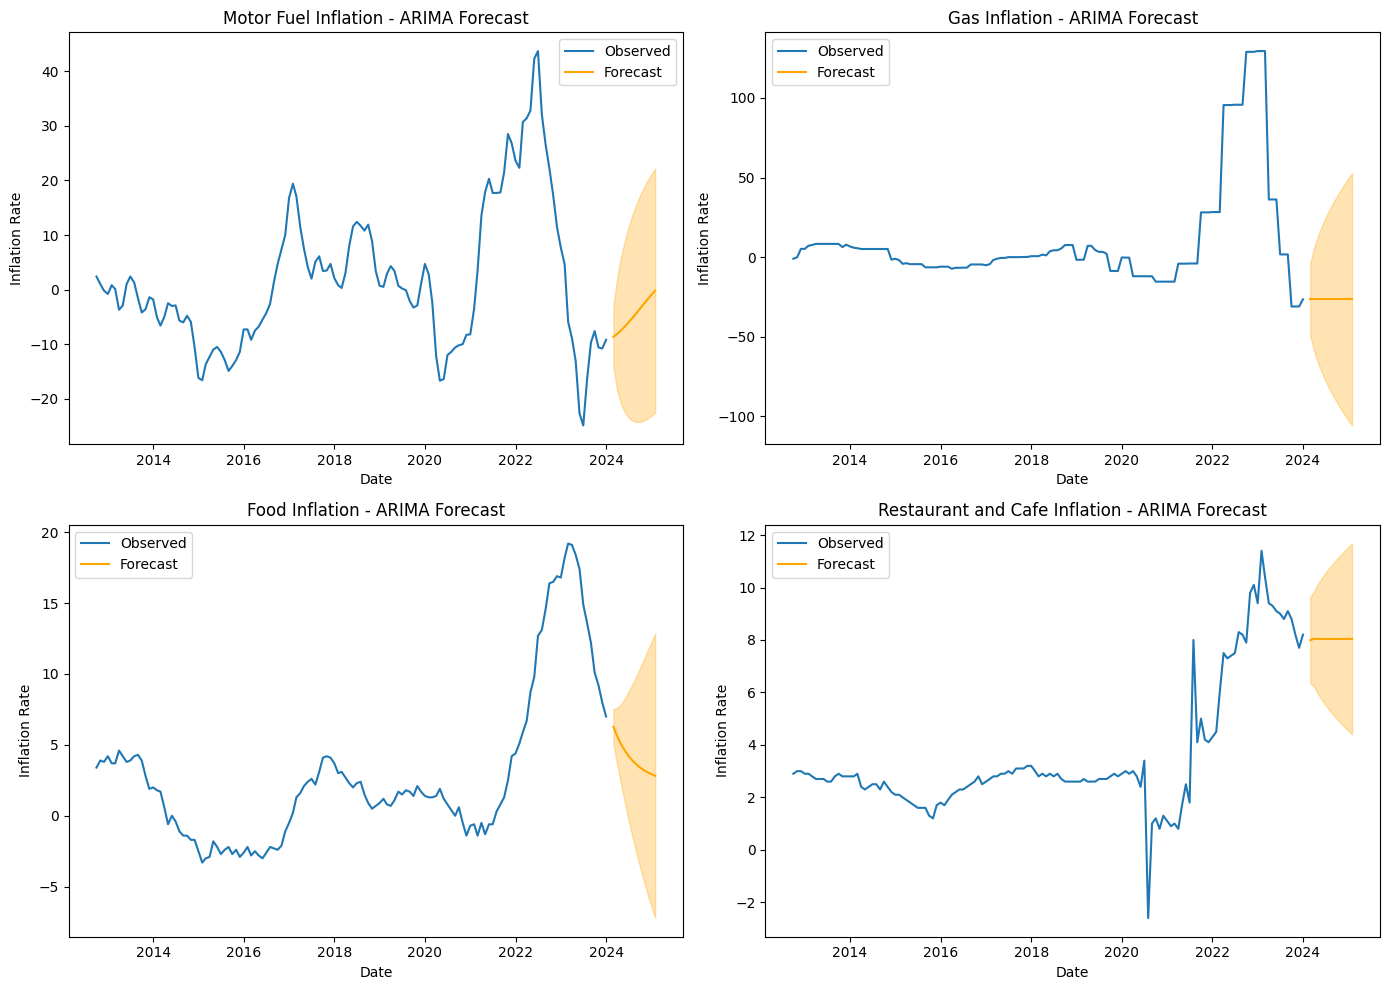

Best ARIMA Order for Motor Fuel Inflation: (2, 0, 2)
Best ARIMA Order for Gas Inflation: (0, 1, 0)
Best ARIMA Order for Food Inflation: (3, 1, 0)
Best ARIMA Order for Restaurant and Cafe Inflation: (2, 1, 0)


In [10]:
!pip install pmdarima
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import pandas as pd
from pmdarima import auto_arima

# Function to fit ARIMA model and forecast
def arima_forecast_auto(series, steps=12):
    auto_model = auto_arima(series, seasonal=False, stepwise=True, trace=True)
    best_order = auto_model.order
    print(f"Best ARIMA Order: {best_order}")

    # Define the ARIMA model with only (p, d, q) parameters
    model = ARIMA(series, order=best_order)
    arima_model = model.fit()
    forecast = arima_model.get_forecast(steps=steps)
    forecast_ci = forecast.conf_int()
    return forecast, forecast_ci, best_order


# Forecast for each dataset
motor_fuel_forecast, motor_fuel_ci, motor_fuel_order = arima_forecast_auto(Motor_fuel_inflation['Motor fuels'])
gas_forecast, gas_ci, gas_order = arima_forecast_auto(gas_inflation['Gas'])
food_forecast, food_ci, food_order = arima_forecast_auto(food_inflation['Food and non-alcoholic beverages'])
restaurant_cafe_forecast, restaurant_cafe_ci, restaurant_cafe_order = arima_forecast_auto(restaurant_cafe_inflation['Restaurants and cafés'])

# Dictionary to hold datasets and their ARIMA results
datasets = {
    'Motor Fuel Inflation': (Motor_fuel_inflation['Motor fuels'], motor_fuel_forecast, motor_fuel_ci),
    'Gas Inflation': (gas_inflation['Gas'], gas_forecast, gas_ci),
    'Food Inflation': (food_inflation['Food and non-alcoholic beverages'], food_forecast, food_ci),
    'Restaurant and Cafe Inflation': (restaurant_cafe_inflation['Restaurants and cafés'], restaurant_cafe_forecast, restaurant_cafe_ci)
}

# Plot ARIMA forecasts in subplots
plt.figure(figsize=(14, 10))

for i, (title, (series, forecast, ci)) in enumerate(datasets.items(), start=1):
    plt.subplot(2, 2, i)
    plt.plot(series.index, series, label='Observed')
    forecast_index = pd.date_range(series.index[-1], periods=len(forecast.predicted_mean) + 1, freq='M')[1:]
    plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='orange')
    plt.fill_between(forecast_index, ci.iloc[:, 0], ci.iloc[:, 1], color='orange', alpha=0.3)
    plt.title(f'{title} - ARIMA Forecast')
    plt.xlabel('Date')
    plt.ylabel('Inflation Rate')
    plt.legend()

plt.tight_layout()
plt.show()

print(f"Best ARIMA Order for Motor Fuel Inflation: {motor_fuel_order}")
print(f"Best ARIMA Order for Gas Inflation: {gas_order}")
print(f"Best ARIMA Order for Food Inflation: {food_order}")
print(f"Best ARIMA Order for Restaurant and Cafe Inflation: {restaurant_cafe_order}")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa9vj3001/capsbrap.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa9vj3001/2ibjteob.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=39756', 'data', 'file=/tmp/tmpa9vj3001/capsbrap.json', 'init=/tmp/tmpa9vj3001/2ibjteob.json', 'output', 'file=/tmp/tmpa9vj3001/prophet_model8geccqax/prophet_model-20241211090122.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:01:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:01:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/

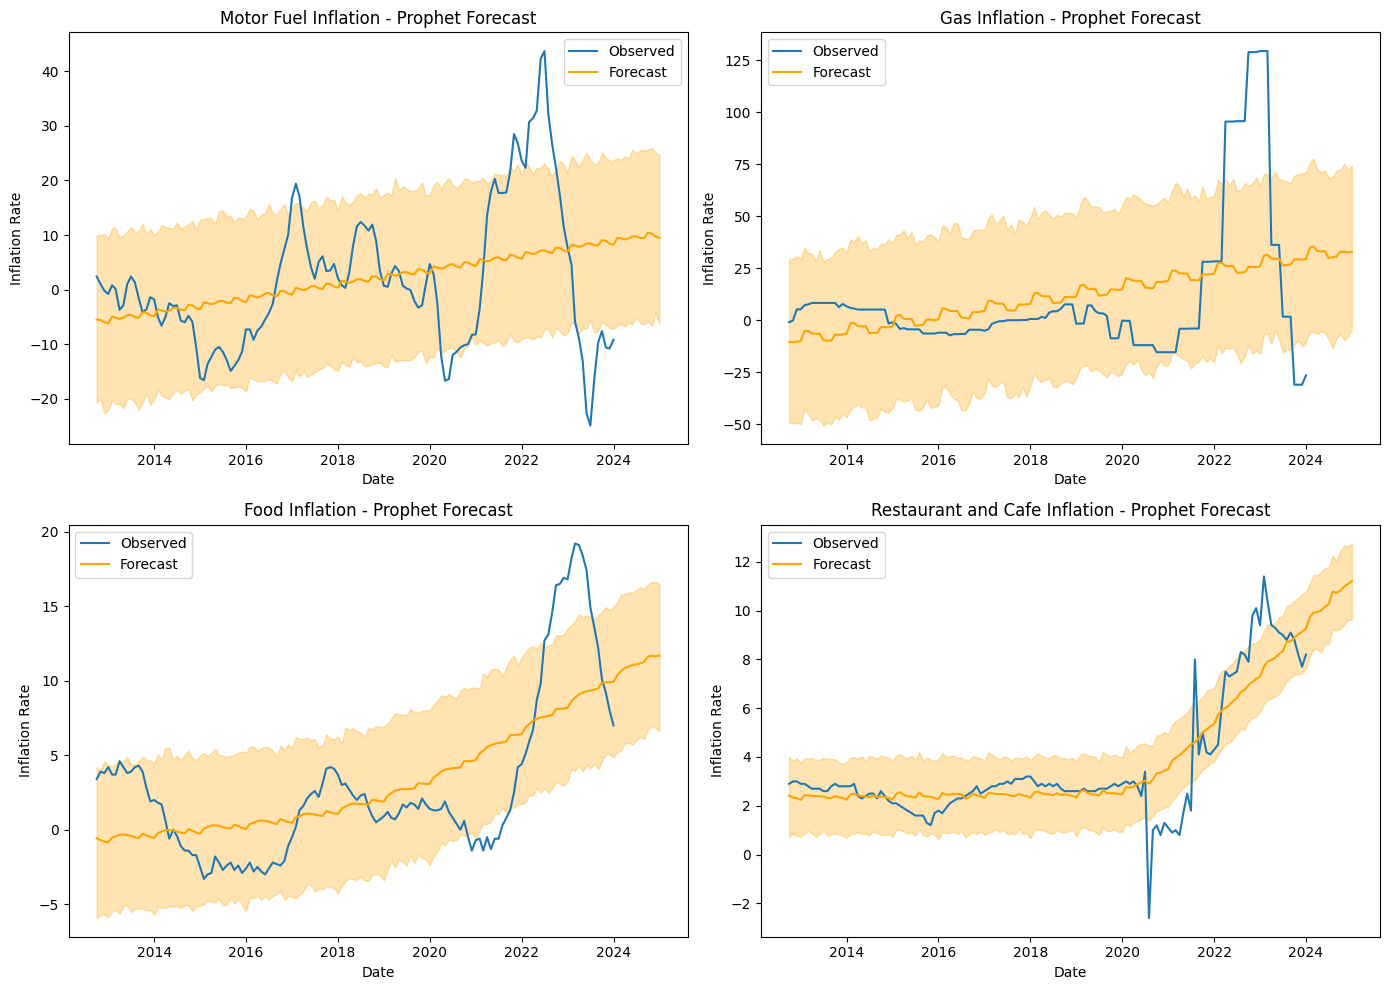

In [14]:
from prophet import Prophet
import matplotlib.pyplot as plt
import pandas as pd

# Function to prepare data and fit Prophet model
def prophet_forecast(df, column_name, steps=12):
    # Prepare the dataframe in the format required by Prophet
    prophet_df = df.reset_index()[['Date', column_name]]
    prophet_df.columns = ['ds', 'y']  # Rename columns as per Prophet requirements

    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(prophet_df)

    # Create future dataframe for forecast
    future = model.make_future_dataframe(periods=steps, freq='M')
    forecast = model.predict(future)

    return forecast, prophet_df

# Forecast for each dataset
motor_fuel_forecast, motor_fuel_df = prophet_forecast(Motor_fuel_inflation, 'Motor fuels')
gas_forecast, gas_df = prophet_forecast(gas_inflation, 'Gas')
food_forecast, food_df = prophet_forecast(food_inflation, 'Food and non-alcoholic beverages')
restaurant_cafe_forecast, restaurant_cafe_df = prophet_forecast(restaurant_cafe_inflation, 'Restaurants and cafés')

# Dictionary to hold datasets and their Prophet results
datasets = {
    'Motor Fuel Inflation': (motor_fuel_df, motor_fuel_forecast),
    'Gas Inflation': (gas_df, gas_forecast),
    'Food Inflation': (food_df, food_forecast),
    'Restaurant and Cafe Inflation': (restaurant_cafe_df, restaurant_cafe_forecast)
}

# Plot Prophet forecasts in subplots
plt.figure(figsize=(14, 10))

for i, (title, (original_df, forecast)) in enumerate(datasets.items(), start=1):
    plt.subplot(2, 2, i)
    plt.plot(original_df['ds'], original_df['y'], label='Observed')
    plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='orange')
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.3)
    plt.title(f'{title} - Prophet Forecast')
    plt.xlabel('Date')
    plt.ylabel('Inflation Rate')
    plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-15-f12bae35fd18>:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1], periods=24, freq='M')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
<ipython-input-15-f12bae35fd18>:31: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(data.index[-1], periods=24, freq='M')
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._ini

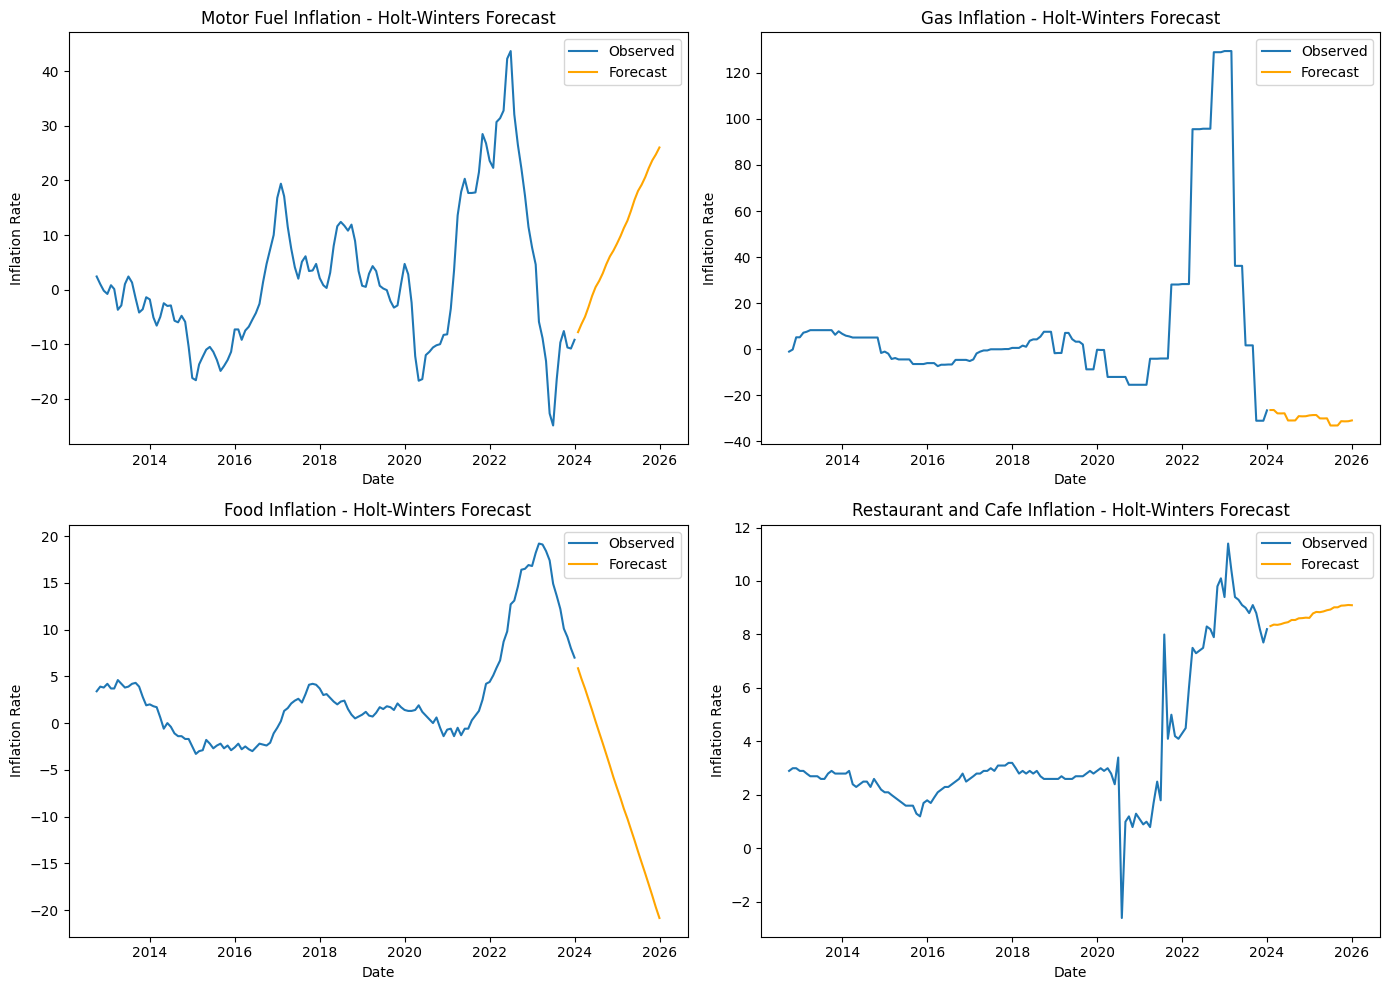

In [15]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Example: Applying Seasonal Holt-Winters on Motor Fuel Inflation data
def holt_winters_forecast(series, seasonal_periods=12, steps=12, trend='add', seasonal='add'):
    # Fit the model
    model = ExponentialSmoothing(series, trend=trend, seasonal=seasonal, seasonal_periods=seasonal_periods)
    hw_model = model.fit()

    # Forecast future values
    forecast = hw_model.forecast(steps=steps)
    return hw_model, forecast

# Apply Holt-Winters to each inflation dataset and plot
datasets = {
    'Motor Fuel Inflation': Motor_fuel_inflation['Motor fuels'],
    'Gas Inflation': gas_inflation['Gas'],
    'Food Inflation': food_inflation['Food and non-alcoholic beverages'],
    'Restaurant and Cafe Inflation': restaurant_cafe_inflation['Restaurants and cafés']
}

plt.figure(figsize=(14, 10))
for i, (title, data) in enumerate(datasets.items(), start=1):
    hw_model, forecast = holt_winters_forecast(data, seasonal_periods=12, steps=24)

    # Plot observed data and forecast
    plt.subplot(2, 2, i)
    plt.plot(data.index, data, label='Observed')
    forecast_index = pd.date_range(data.index[-1], periods=24, freq='M')
    plt.plot(forecast_index, forecast, label='Forecast', color='orange')
    plt.title(f'{title} - Holt-Winters Forecast')
    plt.xlabel('Date')
    plt.ylabel('Inflation Rate')
    plt.legend()

plt.tight_layout()
plt.show()
